In [13]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [14]:
csv_path = 'datasets/tiktok_accounts.csv'

In [15]:
df = pd.read_csv(csv_path)

## Trasformazione Nickname

In [18]:
df['nickname_length'] = 0
df['nickname_num_special_characters'] = 0

pattern = re.compile(r'[^a-zA-Z ]')

df['nickname'] = df['nickname'].fillna('')

for i, nickname in tqdm(enumerate(df['nickname']), desc='Calcolo feature derivate da nickname', total=len(df)):
    df.loc[i, 'nickname_length'] = len(nickname)

    # da valutare se mantenere la feature nickname_num_special_characters
    if nickname == '':
        print(f'{i}-esima istanza ha nickname vuoto')
        df.loc[i, 'nickname_num_special_characters'] = 0
        continue

    special_characters = pattern.findall(str(nickname))

    if len(special_characters) == 0: df.loc[i, 'nickname_num_special_characters'] = 0
    if len(special_characters) == 1: df.loc[i, 'nickname_num_special_characters'] = 1
    if len(special_characters) == 2: df.loc[i, 'nickname_num_special_characters'] = 2
    if len(special_characters) >= 3: df.loc[i, 'nickname_num_special_characters'] = 3

Calcolo feature derivate da nickname:   0%|          | 0/10043 [00:00<?, ?it/s]

In [19]:
df_fake_true = df[df['fake'] == 1]
df_fake_false = df[df['fake'] == 0]

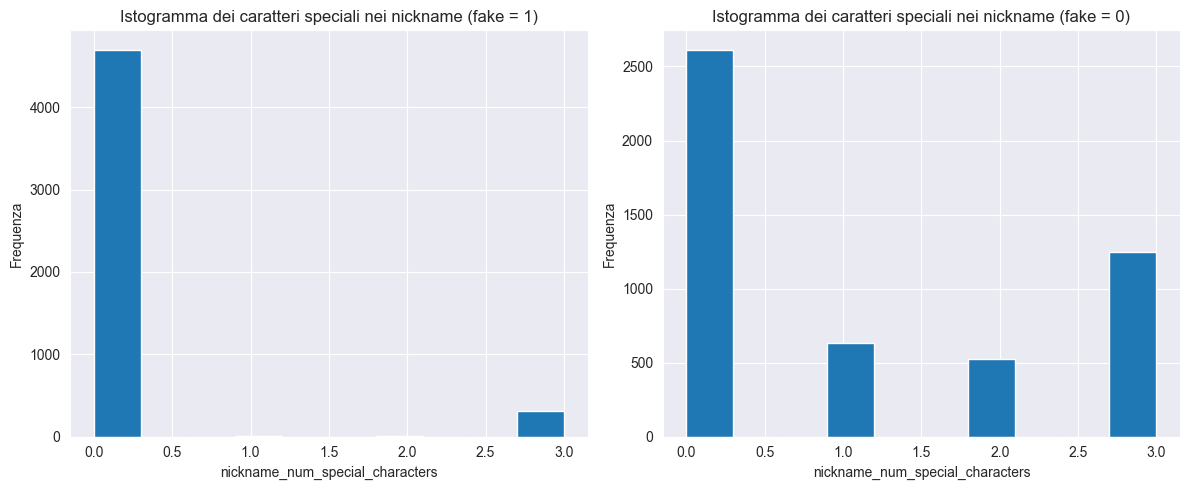

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_fake_true['nickname_num_special_characters'].hist()
plt.xlabel('nickname_num_special_characters')
plt.ylabel('Frequenza')
plt.title('Istogramma dei caratteri speciali nei nickname (fake = 1)')

plt.subplot(1, 2, 2)
df_fake_false['nickname_num_special_characters'].hist()
plt.xlabel('nickname_num_special_characters')
plt.ylabel('Frequenza')
plt.title('Istogramma dei caratteri speciali nei nickname (fake = 0)')

plt.tight_layout()
plt.show()

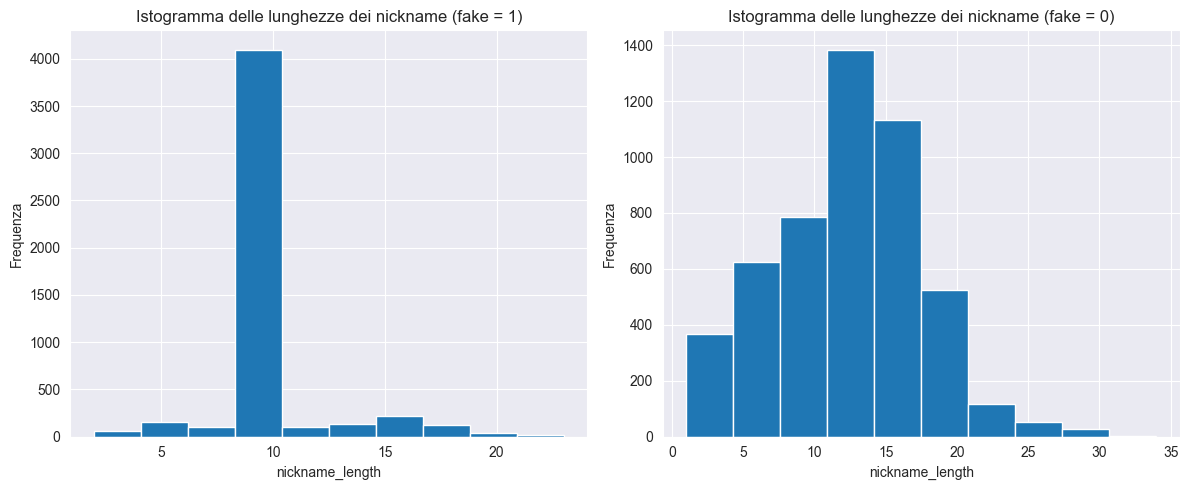

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_fake_true['nickname_length'].hist()
plt.xlabel('nickname_length')
plt.ylabel('Frequenza')
plt.title('Istogramma delle lunghezze dei nickname (fake = 1)')

plt.subplot(1, 2, 2)
df_fake_false['nickname_length'].hist()
plt.xlabel('nickname_length')
plt.ylabel('Frequenza')
plt.title('Istogramma delle lunghezze dei nickname (fake = 0)')

plt.tight_layout()
plt.show()

## Trasformazione uniqueId

In [22]:
df['uniqueId_num_digits'] = 0
df['uniqueId_length'] = 0

pattern = re.compile(r'\d')

for i, uniqueId in enumerate(df['uniqueId']):
    df.loc[i, 'uniqueId_length'] = len(uniqueId)
    list_pattern = pattern.findall(uniqueId)
    len_list_pattern = len(list_pattern)

    # lo consideriamo
    if len_list_pattern == 0: df.loc[i, 'uniqueId_num_digits'] = 0
    if len_list_pattern == 1: df.loc[i, 'uniqueId_num_digits'] = 1
    if len_list_pattern == 2: df.loc[i, 'uniqueId_num_digits'] = 2
    if len_list_pattern >= 3: df.loc[i, 'uniqueId_num_digits'] = 3

In [23]:
df_fake_true = df[df['fake'] == 1]
df_fake_false = df[df['fake'] == 0]

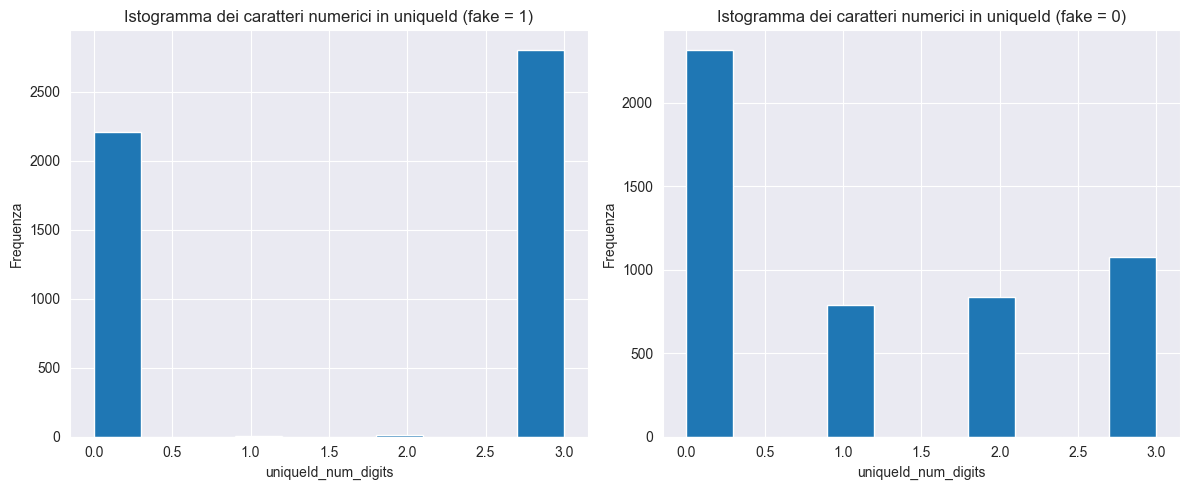

In [24]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
df_fake_true['uniqueId_num_digits'].hist()
plt.xlabel('uniqueId_num_digits')
plt.ylabel('Frequenza')
plt.title('Istogramma dei caratteri numerici in uniqueId (fake = 1)')

plt.subplot(1, 2, 2)
df_fake_false['uniqueId_num_digits'].hist()
plt.xlabel('uniqueId_num_digits')
plt.ylabel('Frequenza')
plt.title('Istogramma dei caratteri numerici in uniqueId (fake = 0)')

plt.tight_layout()
plt.show()

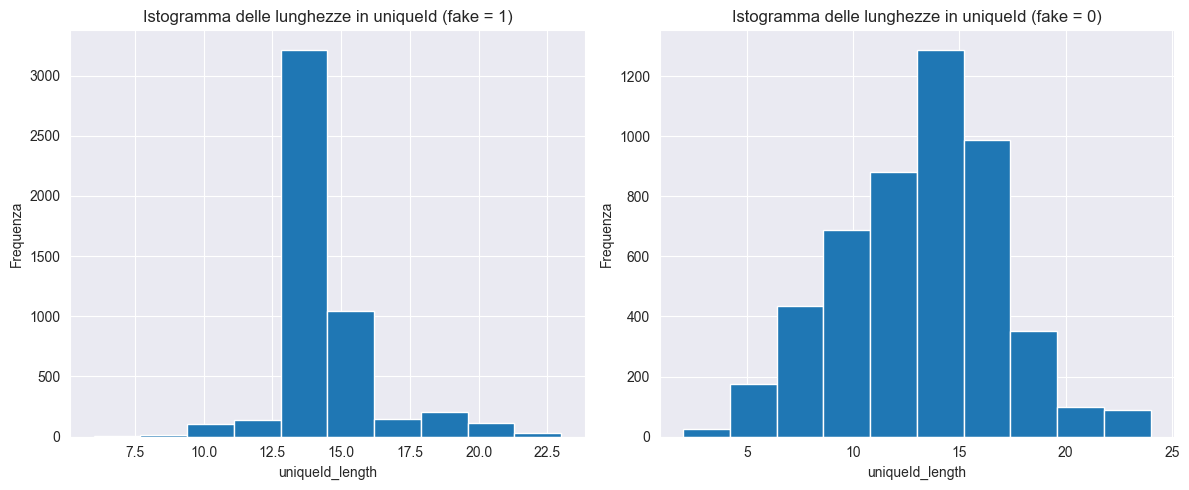

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_fake_true['uniqueId_length'].hist()
plt.xlabel('uniqueId_length')
plt.ylabel('Frequenza')
plt.title('Istogramma delle lunghezze in uniqueId (fake = 1)')

plt.subplot(1, 2, 2)
df_fake_false['uniqueId_length'].hist()
plt.xlabel('uniqueId_length')
plt.ylabel('Frequenza')
plt.title('Istogramma delle lunghezze in uniqueId (fake = 0)')

plt.tight_layout()
plt.show()

## Trasformazione signature

In [30]:
df['signature_length'] = 0

df['signature'] = df['signature'].replace('No bio yet', '')
df['signature'] = df['signature'].fillna('')

for i, signature in enumerate(df['signature']):
    df.loc[i, 'signature_length'] = len(signature)

In [31]:
df_fake_true = df[df['fake'] == 1]
df_fake_false = df[df['fake'] == 0]

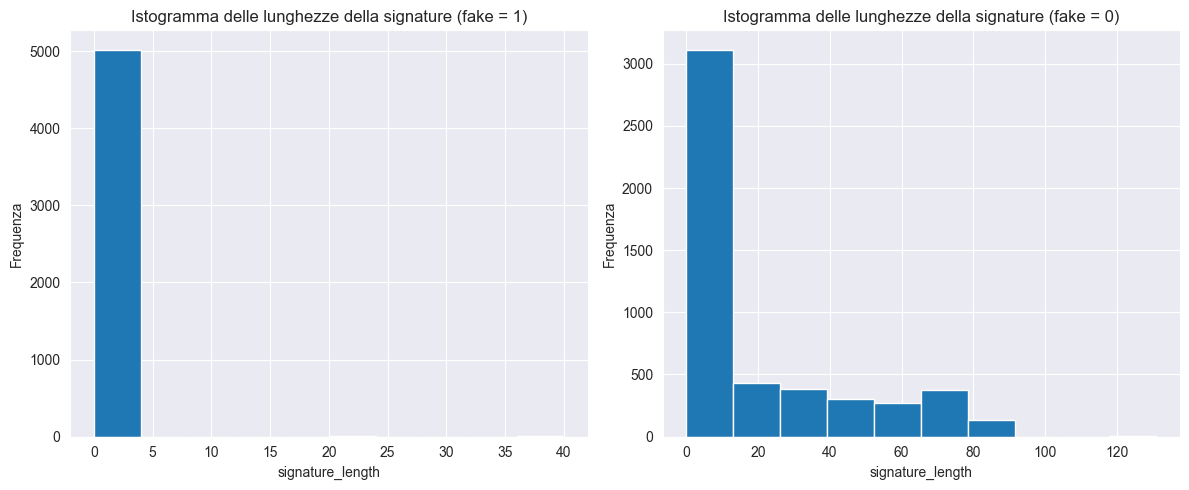

In [32]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
df_fake_true['signature_length'].hist(bins=10)
plt.xlabel('signature_length')
plt.ylabel('Frequenza')
plt.title('Istogramma delle lunghezze della signature (fake = 1)')

plt.subplot(1, 2, 2)
df_fake_false['signature_length'].hist(bins=10)
plt.xlabel('signature_length')
plt.ylabel('Frequenza')
plt.title('Istogramma delle lunghezze della signature (fake = 0)')

plt.tight_layout()
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   diggCount                        10043 non-null  int64 
 1   followerCount                    10043 non-null  int64 
 2   followingCount                   10043 non-null  int64 
 3   heartCount                       10043 non-null  int64 
 4   videoCount                       10043 non-null  int64 
 5   commentSetting                   10043 non-null  int64 
 6   downloadSetting                  10043 non-null  int64 
 7   duetSetting                      10043 non-null  int64 
 8   nickname                         10043 non-null  object
 9   openFavorite                     10043 non-null  bool  
 10  signature                        10043 non-null  object
 11  stitchSetting                    10043 non-null  int64 
 12  uniqueId                        